# Hands-on exercise

In this simple example you are required to perform a simple linear regression with scipy. Find all the information on the function in the documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

LORENZO BURIOLA - 2021860

In [1]:
import matplotlib.pyplot as plt
import csv
from scipy import stats
import numpy as np
import sklearn as sl
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Load the provided .csv file with the used car data

filename = "data/km_year_power_price.csv"
lines = csv.reader(open(filename, newline=''), delimiter=',')

# place your loading code here

dataset = list(lines)
dataset.pop(0)
km = []
year = []
power = []
price = []
for row in dataset:
    km.append(float(row[0]))
    year.append(float(row[1]))
    power.append(float(row[2]))
    price.append(float(row[3]))

km = np.array(km)
year = np.array(year)
power = np.array(power)
price = np.array(price)

Use a linear regression to estimate the car prices from the year, kilometers or engine power. 
You can make a simple 1D regression from each one of the parameters independently 




slope = 1509.09
intercept = -3018309.48


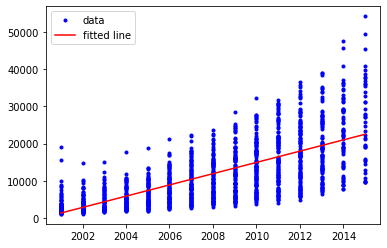

In [3]:
# linear regression with linregress (estimate price from year)

# your code.....

Reg = stats.linregress(year, price)
slope = Reg.slope
intercept = Reg.intercept
print("slope = %.2f" %slope)
print("intercept = %.2f" %intercept)

plt.plot(year, price, 'b.', label = 'data')
plt.plot(year, slope*year + intercept, label = 'fitted line', color='r')
plt.legend()
plt.show()



slope = 1509.09
intercept = -3018309.48


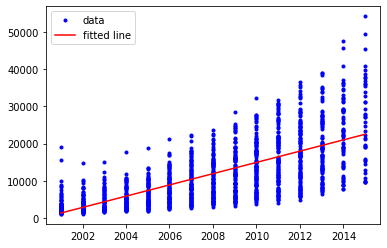

In [4]:
# (Optional) linear regression with linear_model.LinearRegression() (estimate price from year)

# your code.....

X = year.reshape(-1, 1)
Reg2 = linear_model.LinearRegression().fit(X, price)
slope = Reg2.coef_
intercept = Reg2.intercept_
print("slope = %.2f" %slope)
print("intercept = %.2f" %intercept)

plt.plot(year, price, 'b.', label = 'data')
plt.plot(year, slope*year + intercept, label = 'fitted line', color='r')
plt.legend()
plt.show()

slope = 1509.09
intercept = -3018309.48


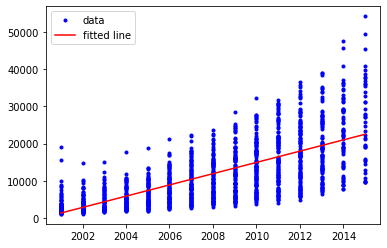

In [5]:
# linear regression with least squares (estimate price from year)
# You should get exactly the same solution of linregress !

# your code.....

def LastSquqre_fit(x, y):
    x0 = np.ones(len(x))
    x = x.reshape(-1, 1)
    x0 = x0.reshape(-1,1)
    y = y.reshape(-1,1)
    X = np.concatenate((x0, x), axis = 1)
    A = X.T.dot(X)
    b = X.T.dot(y)
    w = np.linalg.inv(A).dot(b)
    return w

W = LastSquqre_fit(year, price)
slope = W[1]
intercept = W[0]

print("slope = %.2f" %slope)
print("intercept = %.2f" %intercept)

plt.plot(year, price, 'b.', label = 'data')
plt.plot(year, slope*year + intercept, label = 'fitted line', color='r')
plt.legend()
plt.show()


In [6]:
# Plot the data and the lines representing the output of the linregress and least square algorithms

# your code....


slope = 90.33
intercept = -1303.91


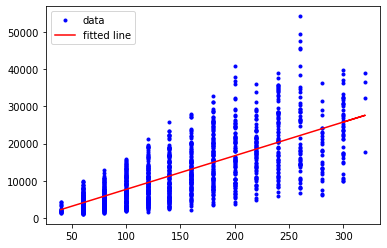

In [7]:
# linear regression with linregress (estimate price from power)

# your code.....

Reg = stats.linregress(power, price)
slope = Reg.slope
intercept = Reg.intercept
print("slope = %.2f" %slope)
print("intercept = %.2f" %intercept)

plt.plot(power, price, 'b.', label = 'data')
plt.plot(power, slope*power + intercept, label = 'fitted line', color='r')
plt.legend()
plt.show()


slope = -0.05
intercept = 16692.35


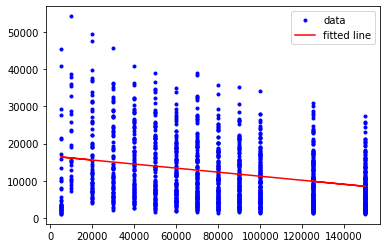

In [8]:
# linear regression with linregress (estimate price from km)

# your code...

Reg = stats.linregress(km, price)
slope = Reg.slope
intercept = Reg.intercept
print("slope = %.2f" %slope)
print("intercept = %.2f" %intercept)

plt.plot(km, price, 'b.', label = 'data')
plt.plot(km, slope*km + intercept, label = 'fitted line', color='r')
plt.legend()
plt.show()

In [9]:
# Have a look at the correlation coefficients to see which of the 3 features works better

# your code......



p1 = 1325.23
p2 = 80.43
intercept = -3018309.48


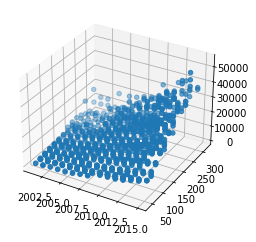

In [15]:
# Optional : 2D linear regression with linear model (estimate price from year and power)


# your code......

x1 = year.reshape(-1,1)
x2 = power.reshape(-1,1)

X = np.concatenate((x1, x2), axis = 1)

Reg3 = linear_model.LinearRegression().fit(X, price)
p1 = Reg3.coef_[0]
p2 = Reg3.coef_[1]
intercept = Reg2.intercept_
print("p1 = %.2f" %p1)
print("p2 = %.2f" %p2)
print("intercept = %.2f" %intercept)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(year, power, price)
plt.show()